# BuzzFeedNews Facebook Facts

## Setup and import libraries

In [1]:
# Automatically reloading imported modules
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import *

pd.set_option('display.max_columns', None)

In [3]:
# Change design of plots
sns.set(style="whitegrid")

# Change sizes and resolution of plots
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

## Load the data

In [4]:
df = pd.read_csv('data/data.csv')

## General descriptive analysis

Let's check shape of the data - number of rows and attributes:

In [5]:
df.shape

(2282, 12)

Overview of the data:

In [6]:
df.head()

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


### Datatypes

**Note:** Be careful, attributes with only NaN values are considered as `float64` type by default.

In [7]:
df.dtypes

account_id          int64
post_id             int64
Category           object
Page               object
Post URL           object
Date Published     object
Post Type          object
Rating             object
Debate             object
share_count       float64
reaction_count    float64
comment_count     float64
dtype: object

### Basic characteristics

In [8]:
df.describe()

,account_id,post_id,share_count,reaction_count,comment_count
count,2.282000e+03,2.282000e+03,2.212000e+03,2280.000000,2280.000000
mean,1.867111e+14,3.299586e+15,4.044816e+03,5364.284649,516.102193
std,1.393826e+14,3.808724e+15,2.983192e+04,19126.544561,3569.355445
min,6.231759e+10,5.510967e+14,1.000000e+00,2.000000,0.000000
25%,1.145179e+14,1.247441e+15,2.400000e+01,149.000000,37.000000
50%,1.840966e+14,1.290536e+15,9.600000e+01,545.500000,131.500000
75%,3.469371e+14,1.540752e+15,7.390000e+02,2416.750000,390.250000
max,4.401065e+14,1.015386e+16,1.088995e+06,456458.000000,159047.000000


In [9]:
df.describe(exclude=[np.number])

,Category,Page,Post URL,Date Published,Post Type,Rating,Debate
count,2282,2282,2282,2282,2282,2282,298
unique,3,9,2282,7,4,4,1
top,mainstream,Politico,https://www.facebook.com/politico/posts/101538...,2016-09-26,link,mostly true,yes
freq,1145,536,1,403,1780,1669,298


### One-value columns

Which attributes contain only one value?

In [10]:
one_value_attributes_analysis(df)

Debate


### Missing values

Analysis of missing values in attributes:

Debate: 1984 (86.94%)
share_count: 70 (3.07%)
reaction_count: 2 (0.09%)
comment_count: 2 (0.09%)

Missing values plot (inverse logic, plot is showing how many values are not NaN):


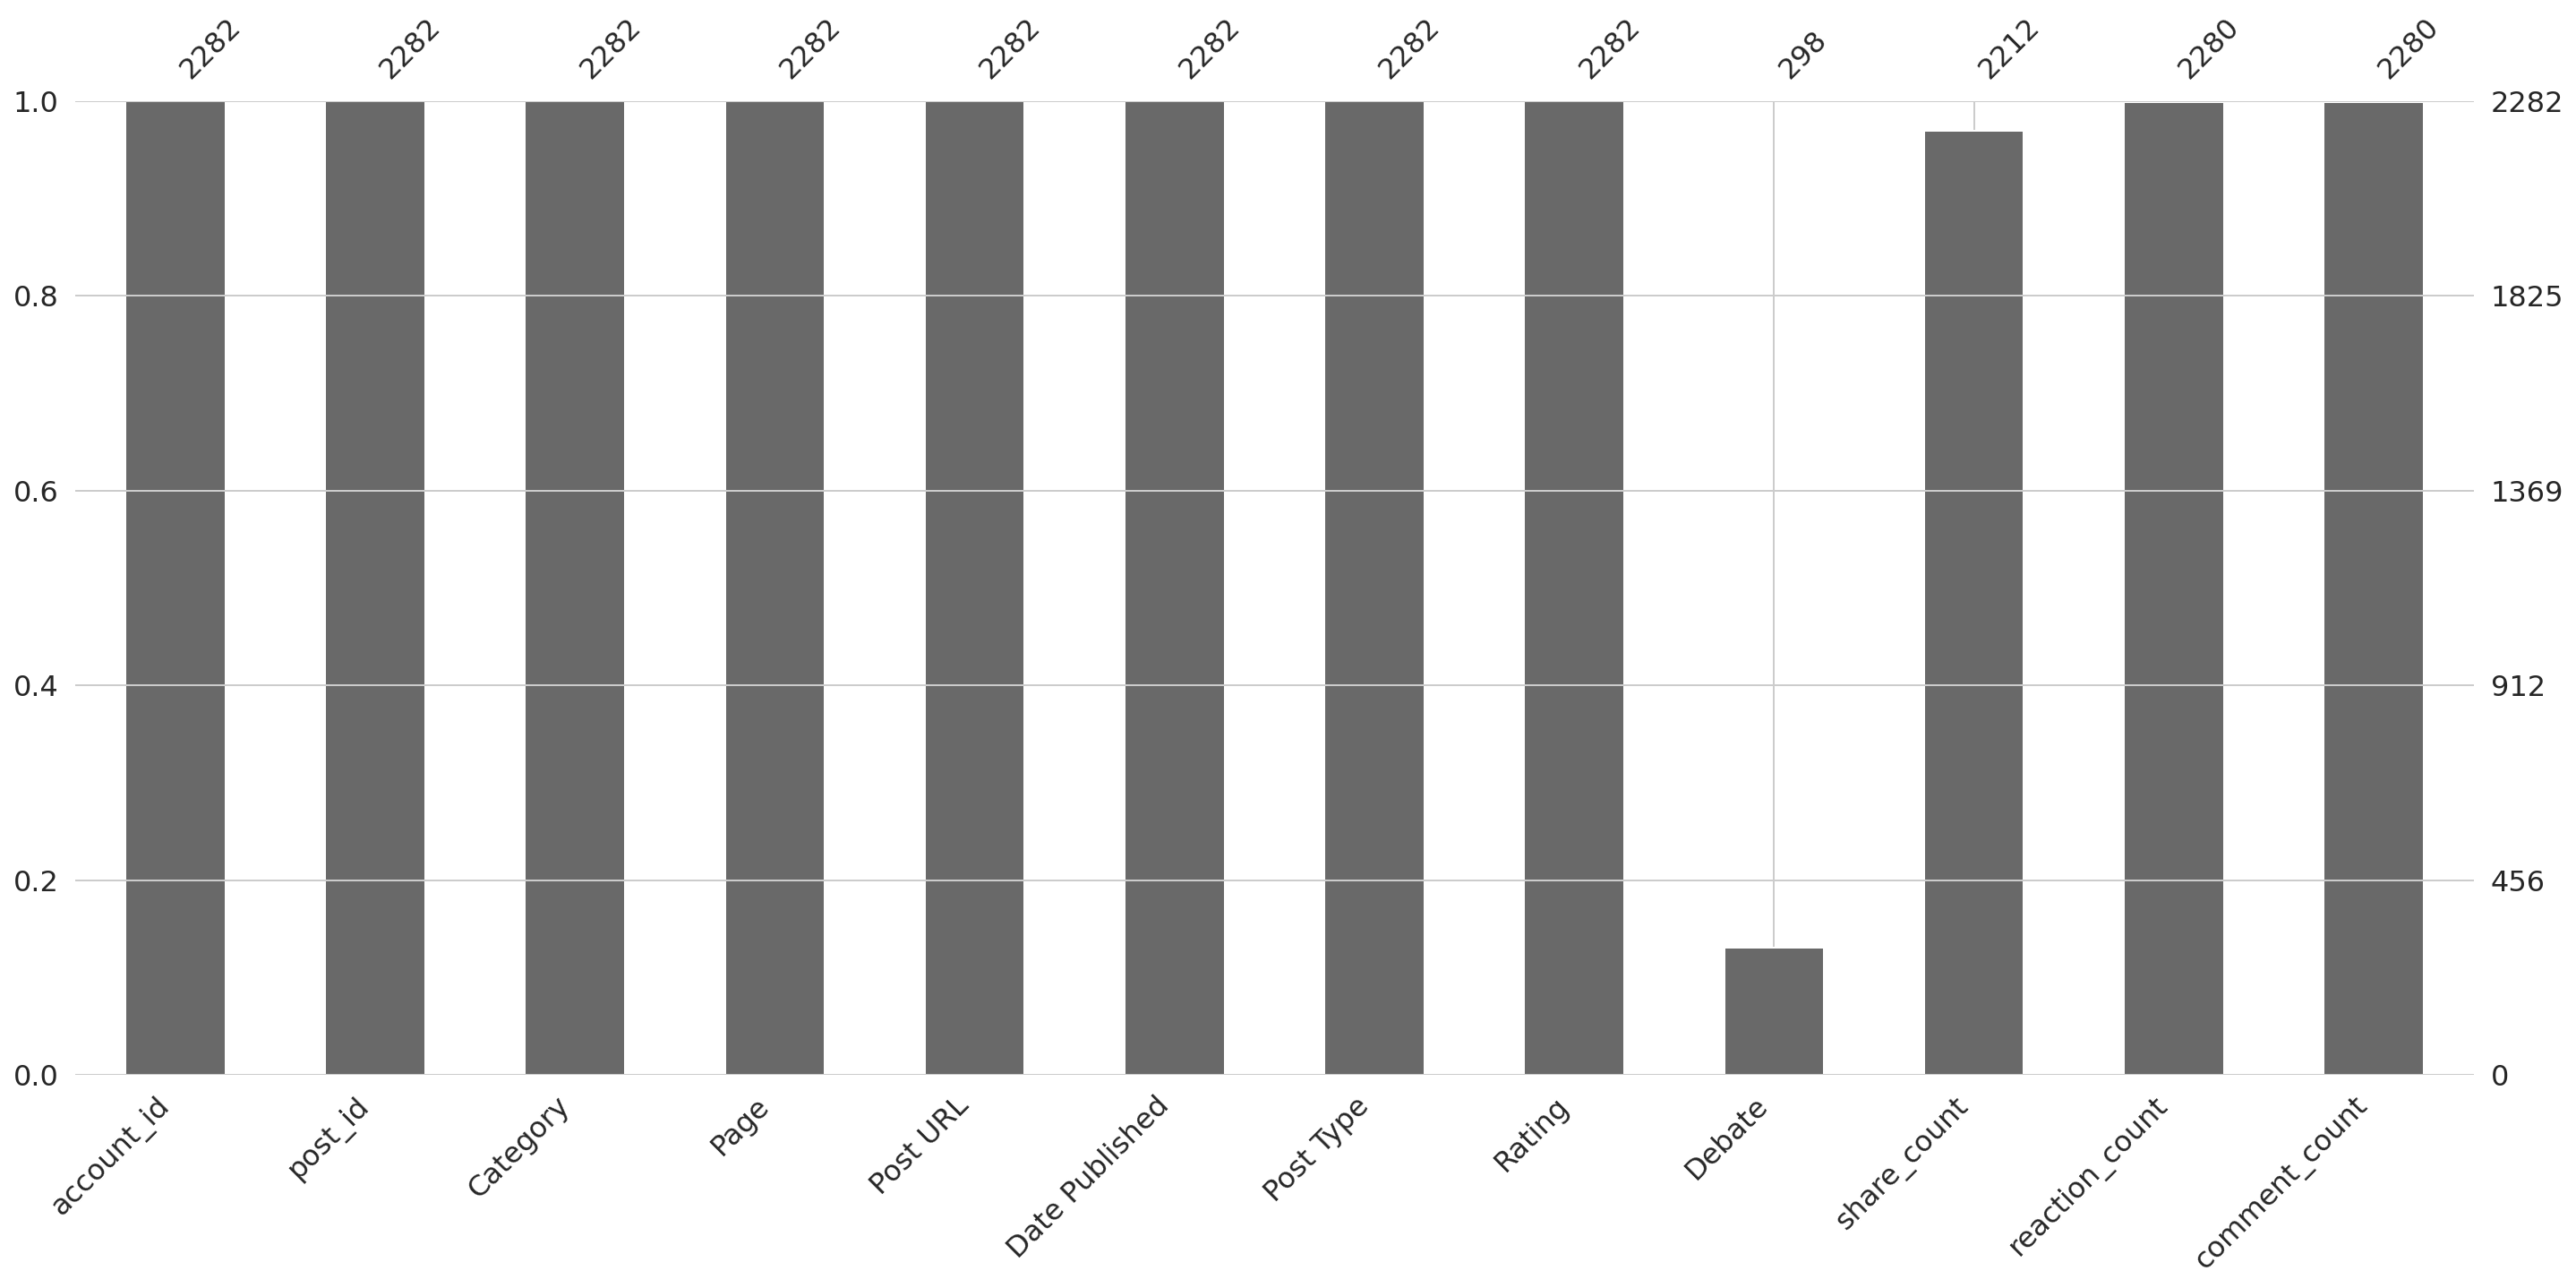

In [11]:
missing_values_analysis(df)

### Duplicates

Are there any duplicates?

In [12]:
df.duplicated().any()

False

## Attributes analysis

Analysis of all attributes:

In [13]:
skip_attributes = [
    'account_id', 'post_id', 'Date Published'
] # attributes to skip in analysis (e.g. id)

textual_attributes = [
    'Post URL'
] # attributes with text values (e.g. content of article)
textual_attributes = list(filter(lambda value: value not in skip_attributes, textual_attributes))

numerical_attributes = list(df.select_dtypes([np.number]).columns)
numerical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, numerical_attributes))

categorical_attributes = list(df.select_dtypes(['object', 'category']).columns)
categorical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, categorical_attributes))

label_column = 'Rating' # attribute considered as "label"

### Label attribute distribution

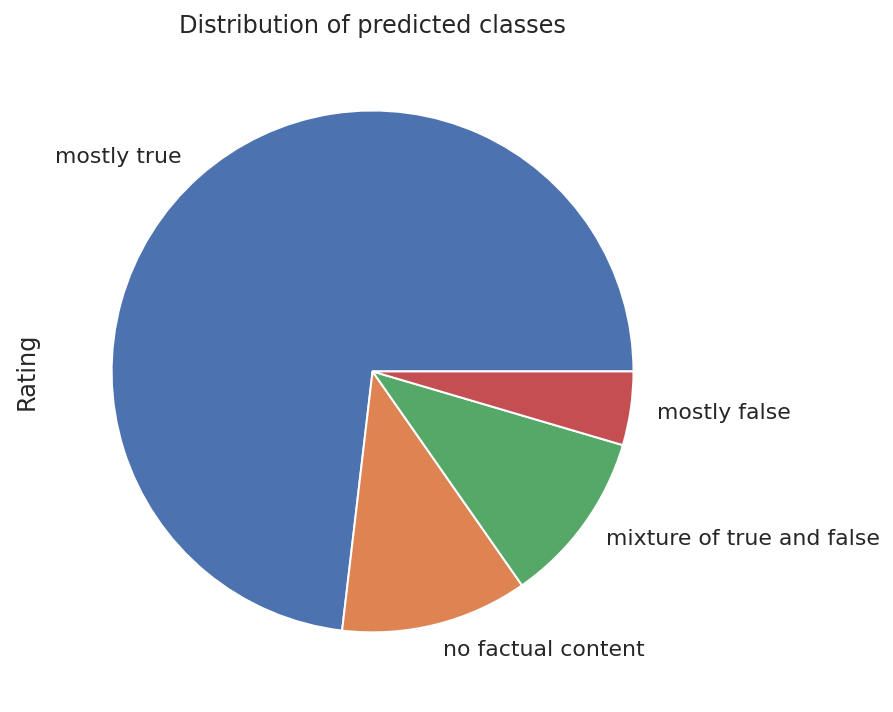

In [14]:
df[label_column].value_counts().plot(kind='pie', title='Distribution of predicted classes');

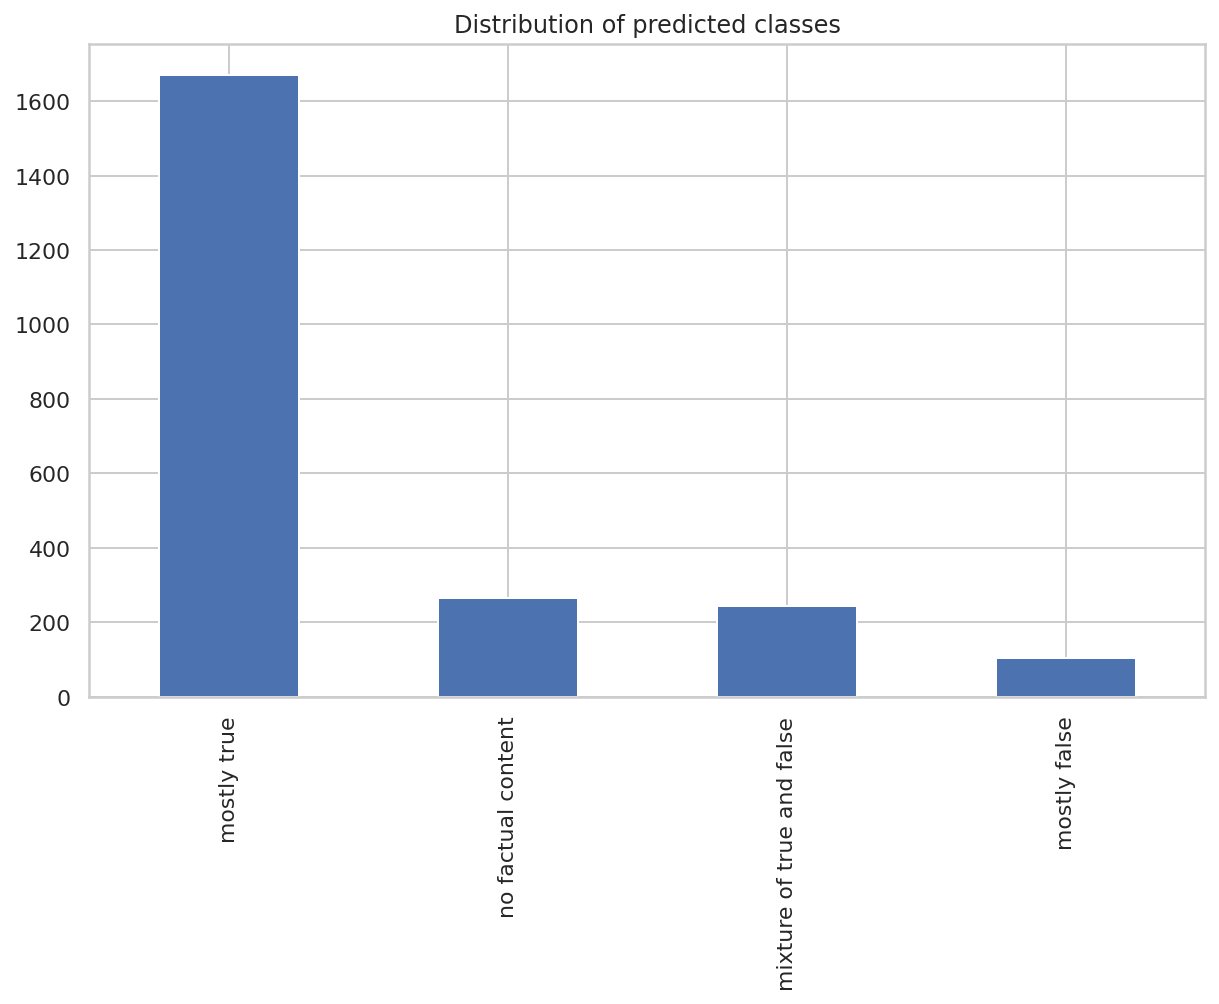

In [15]:
df[label_column].value_counts().plot(kind='bar', title='Distribution of predicted classes');

### Numerical attributes

Analysis of numerical attributes:



Analysis of attribute "share_count"


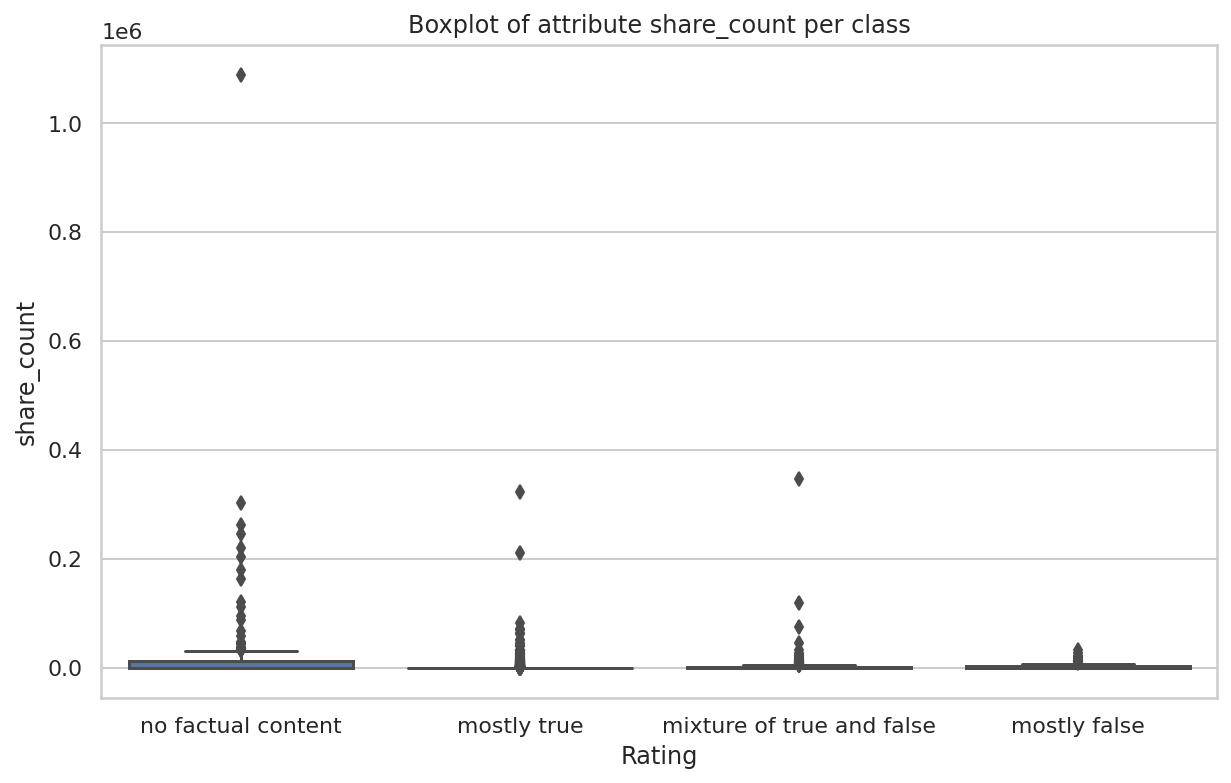

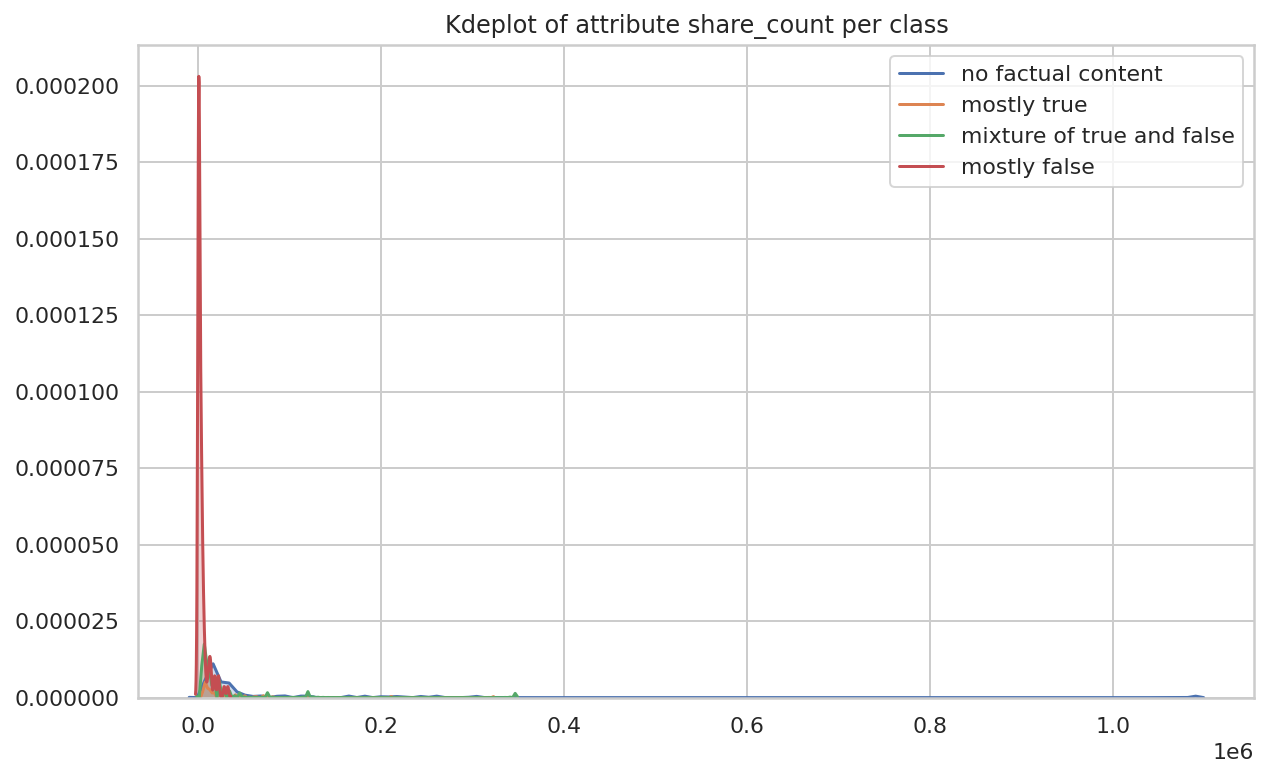



Analysis of attribute "reaction_count"


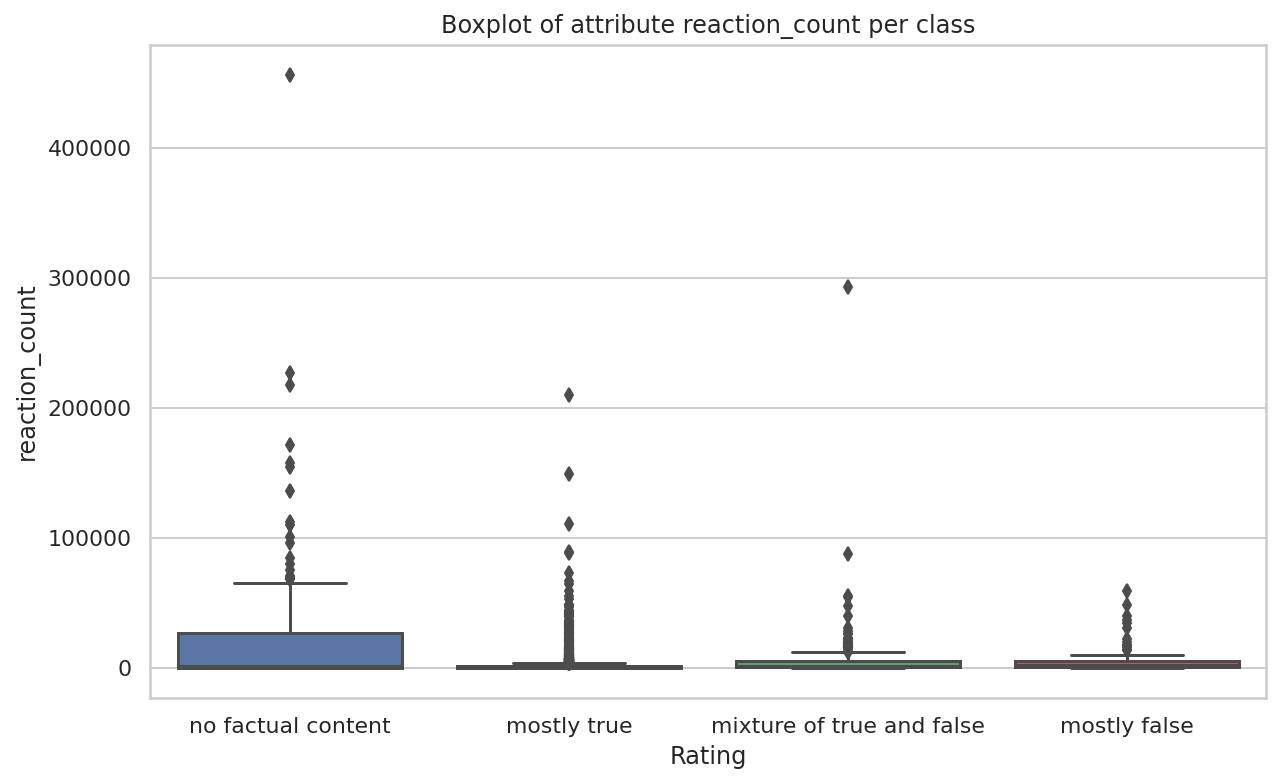

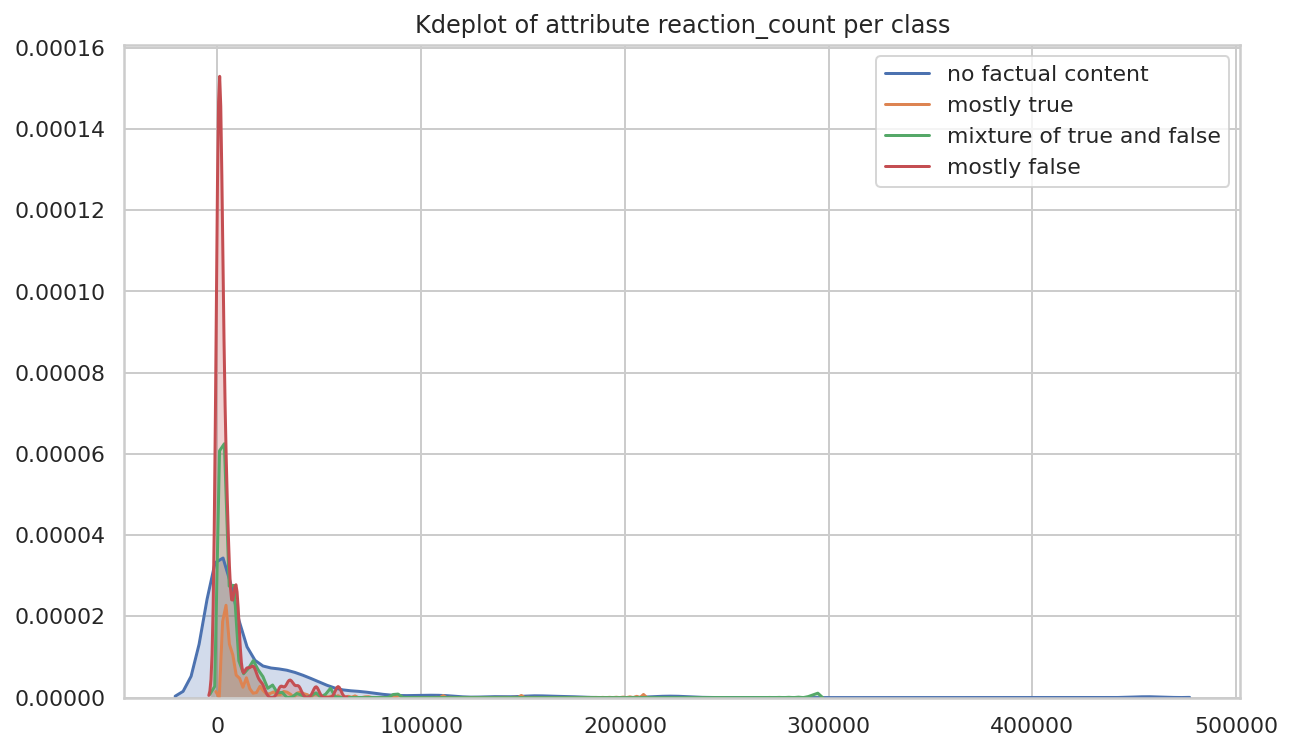



Analysis of attribute "comment_count"


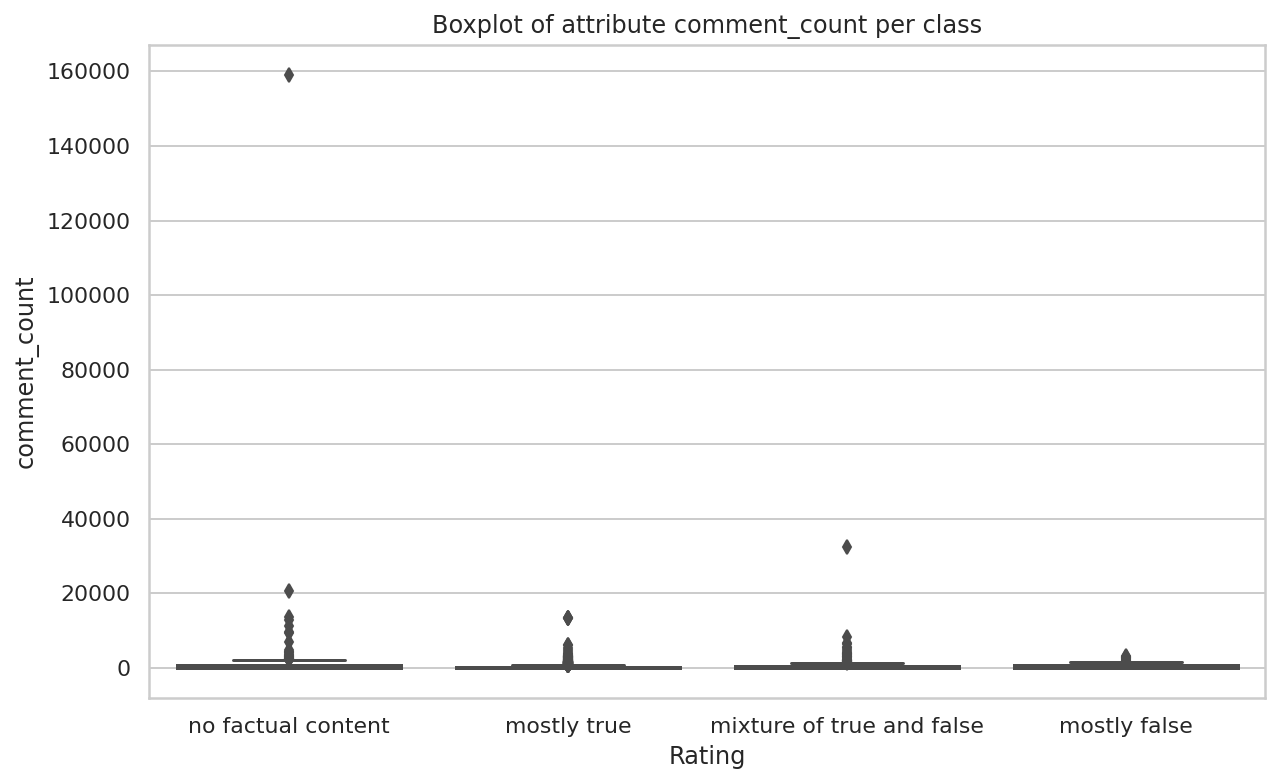

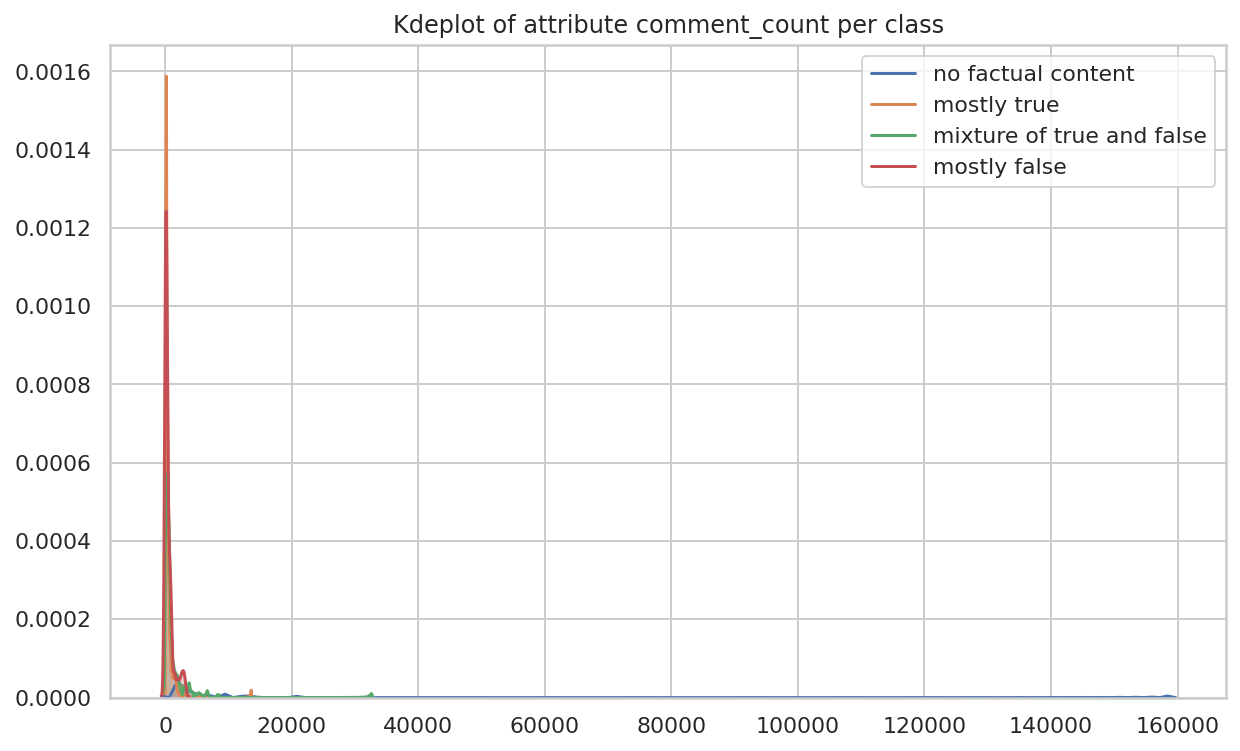

In [16]:
analyse_numerical_attributes(df, label_column, numerical_attributes)

### Categorical attributes

Analysis of categorical attributes:



Analysis of attribute "Category"


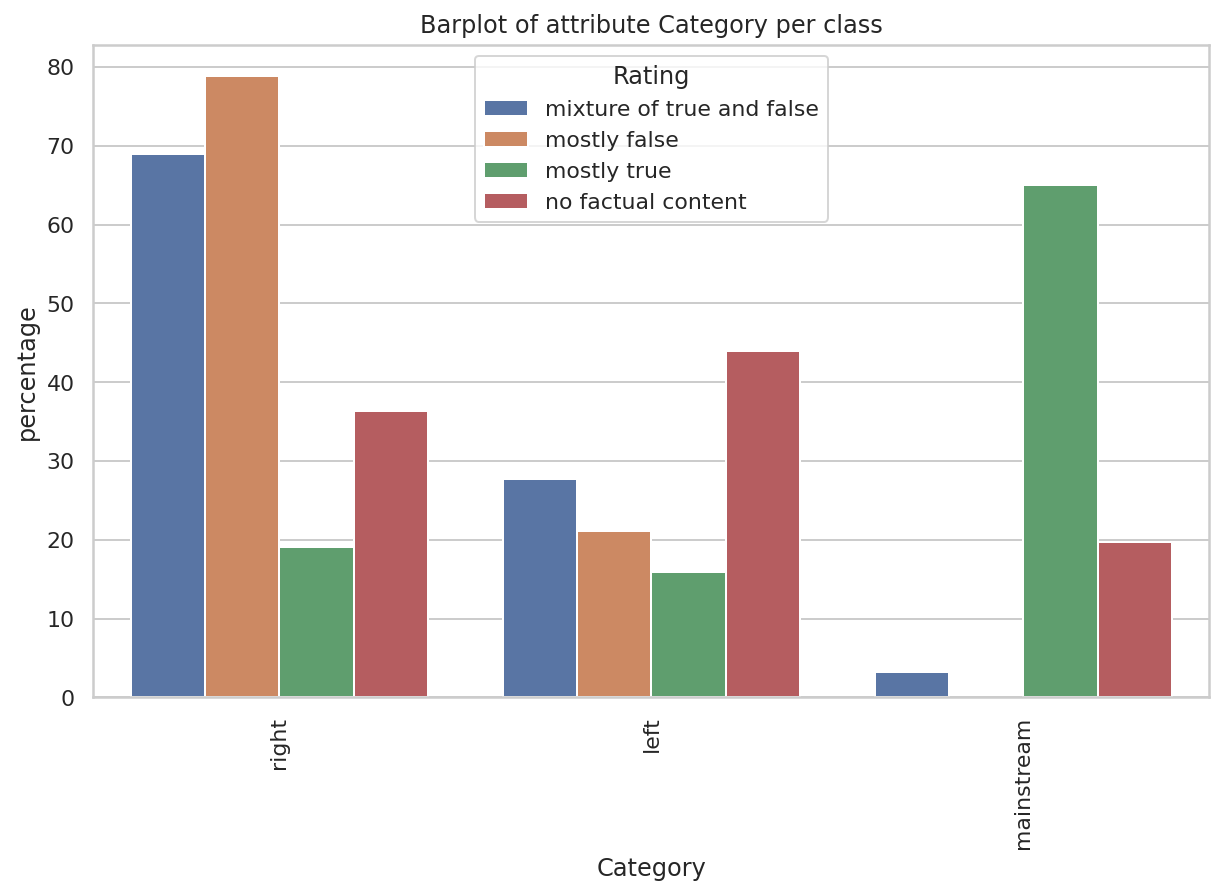



Analysis of attribute "Page"


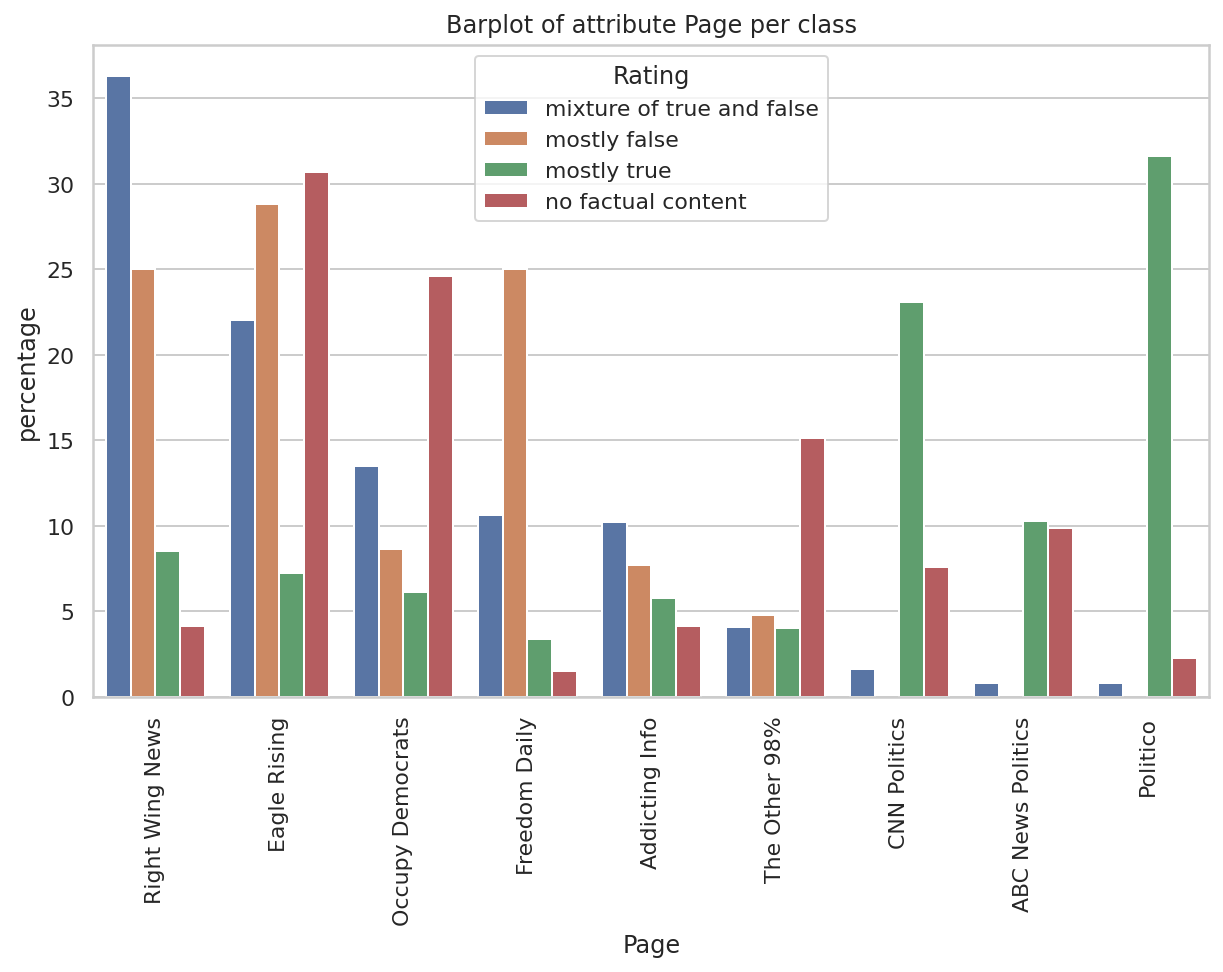



Analysis of attribute "Post Type"


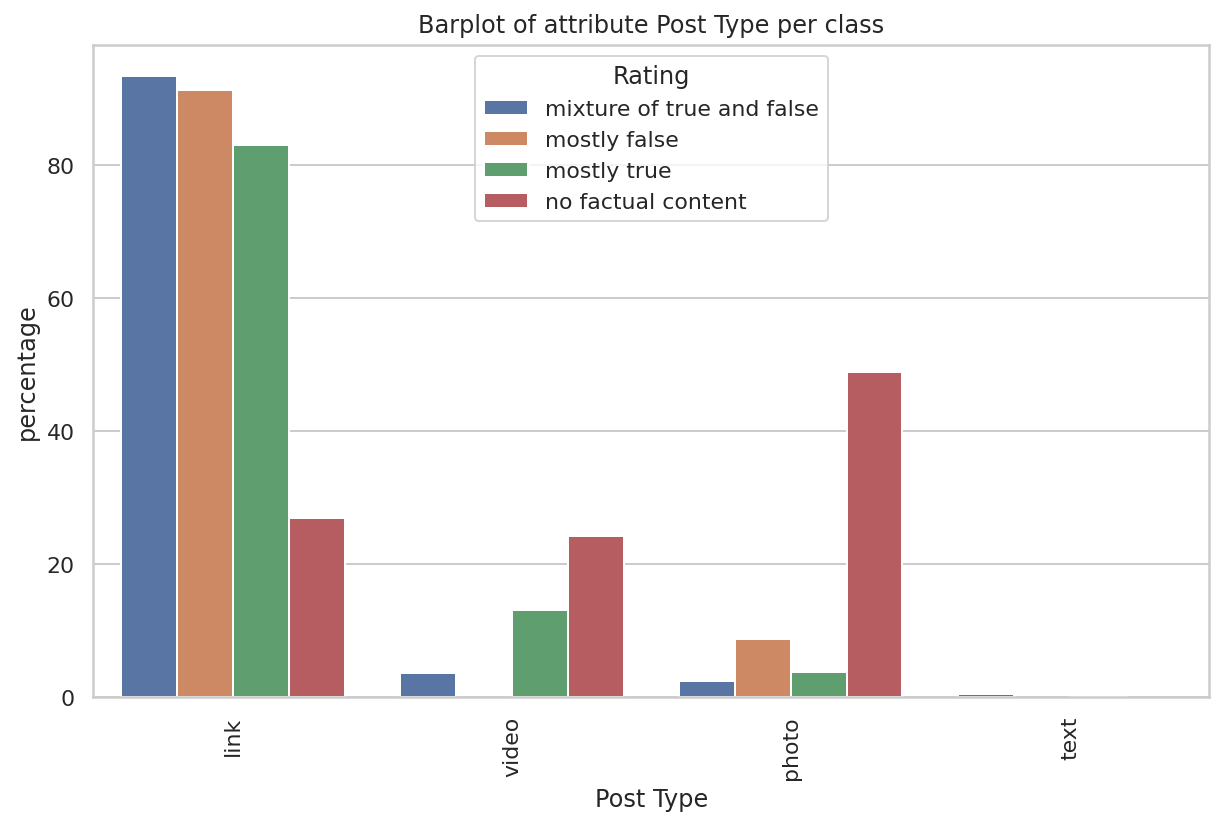



Analysis of attribute "Debate"


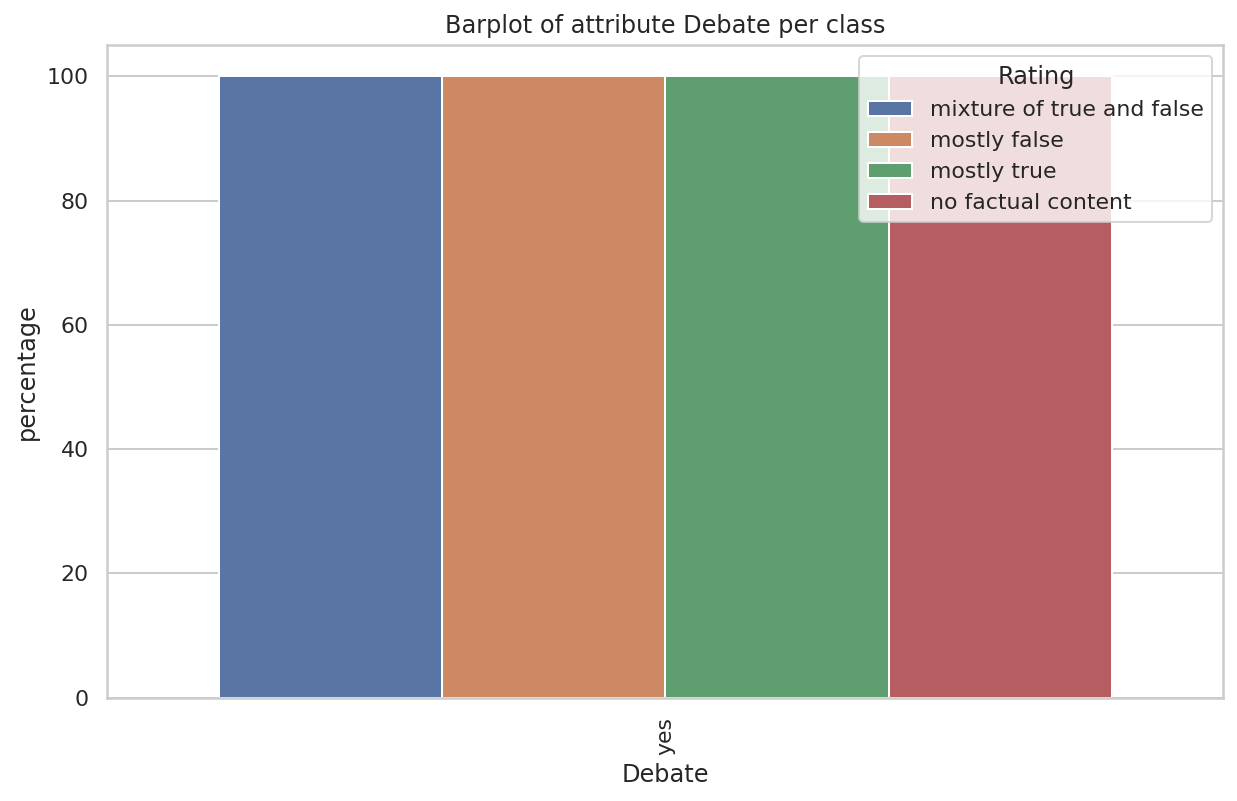

In [17]:
analyse_categorical_attributes(df, label_column, categorical_attributes)

### Textual attributes

Some parts of analysis include preprocessing text. In this case, the following operations are performed:
* removing special characters (only letters are preserved),
* removing tokens shorter than 3 characters,
* removing tokens that are in english stop-words defined by NLTK library,
* removing accent marks from tokens.

Analysis of textual attributes:



Analysis of attribute "Post URL"


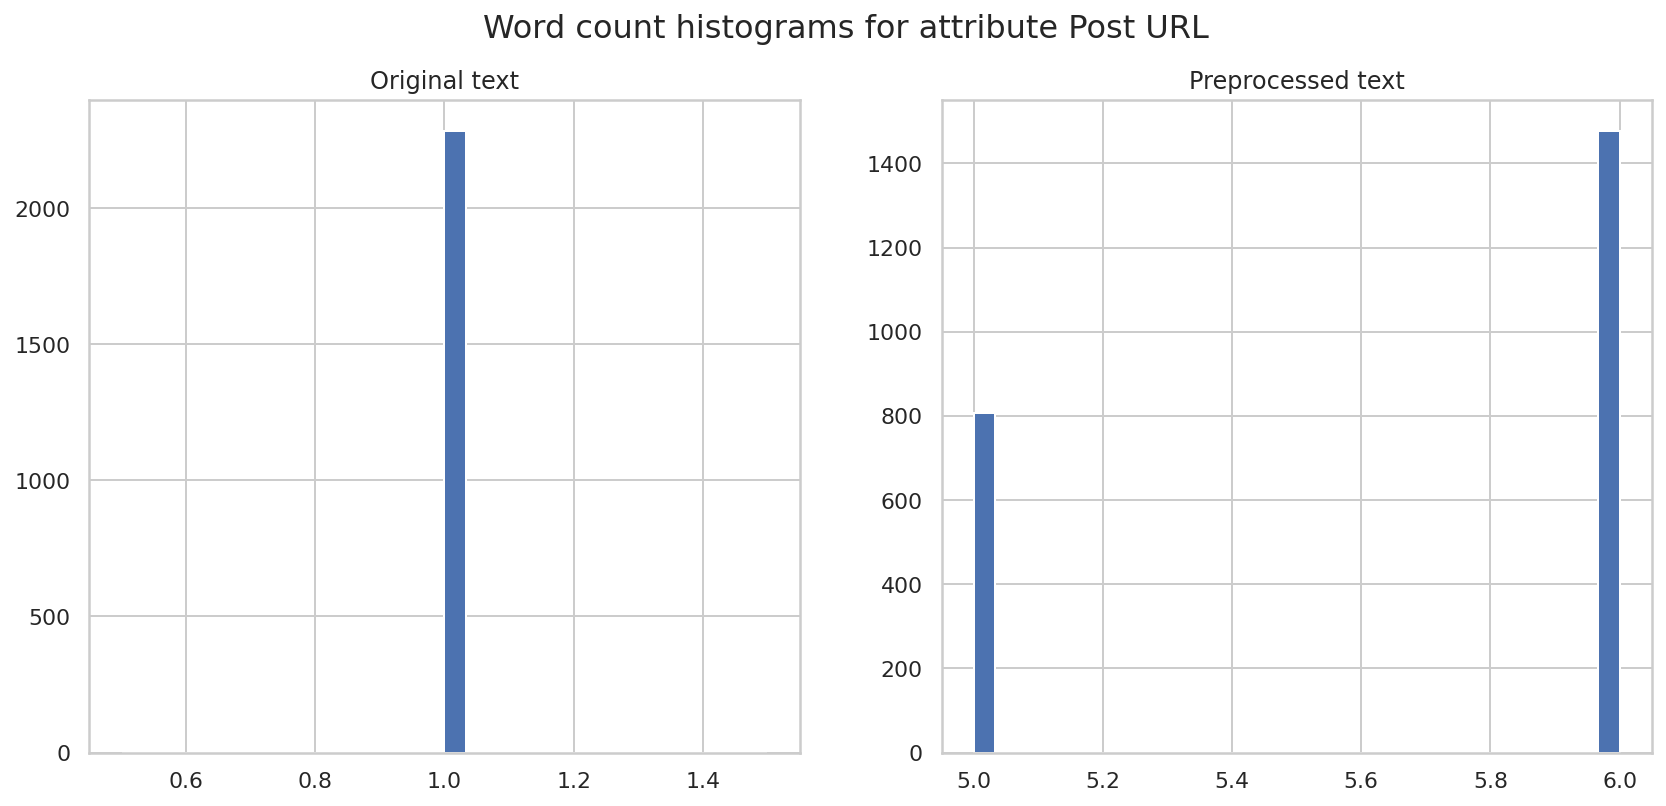

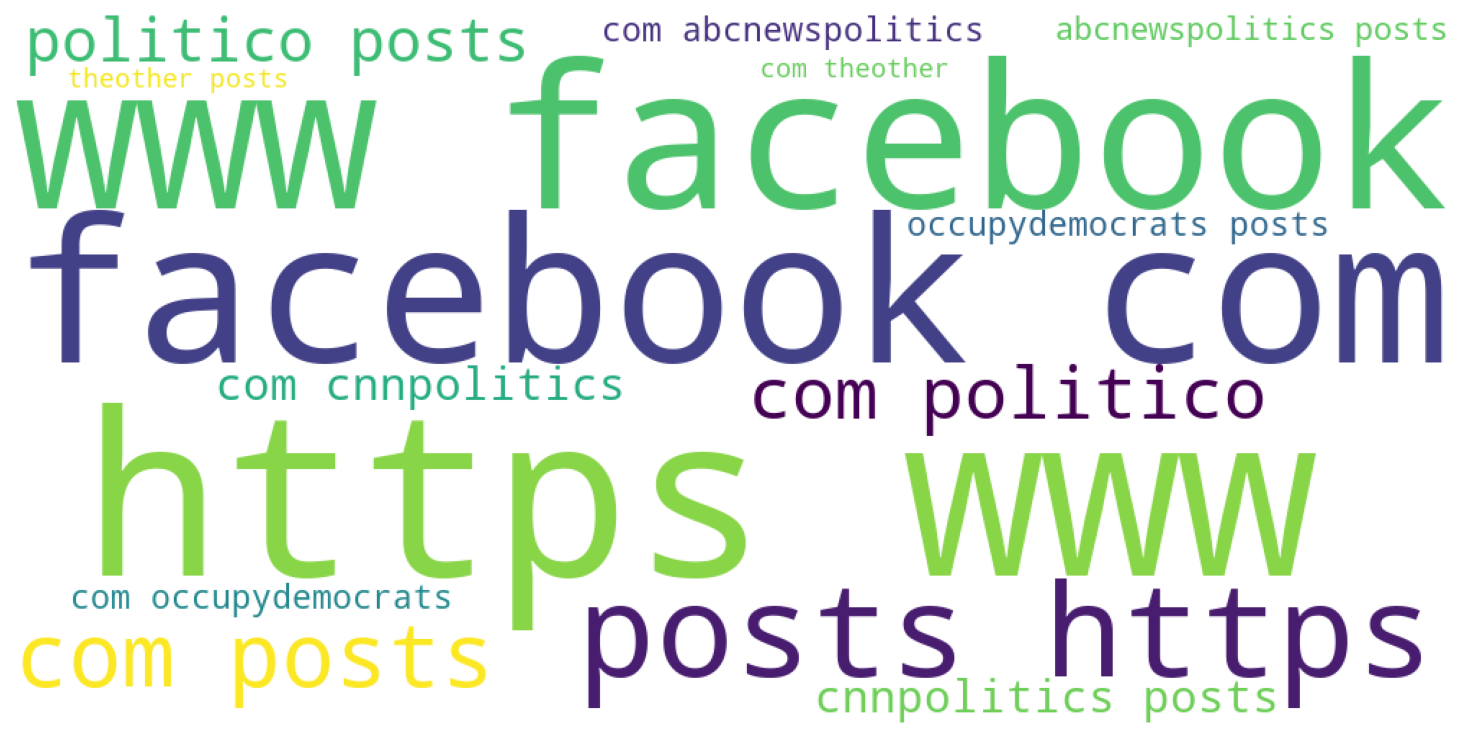

In [18]:
analyse_textual_attributes(df, textual_attributes)

## Pairwise analysis

Pairwise analysis of attributes (numerical attributes):

### Pair analysis

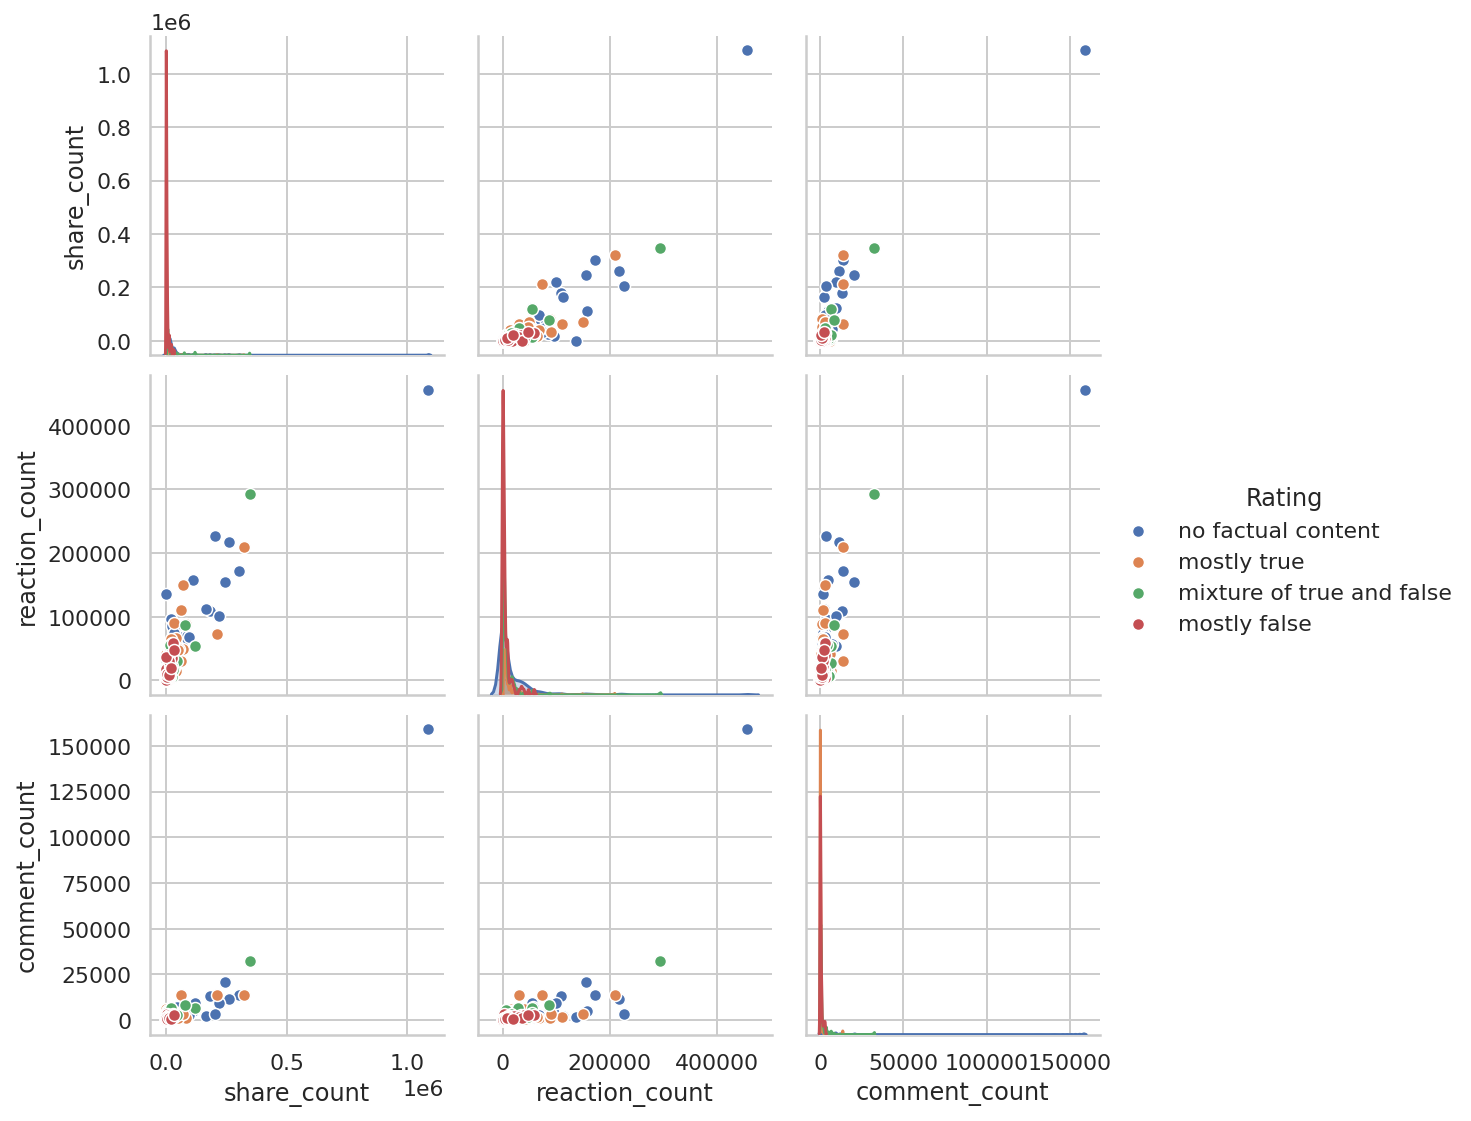

In [19]:
if numerical_attributes:
    sns.pairplot(df, vars=numerical_attributes, hue=label_column);

### Correlations

Correlation matrix:

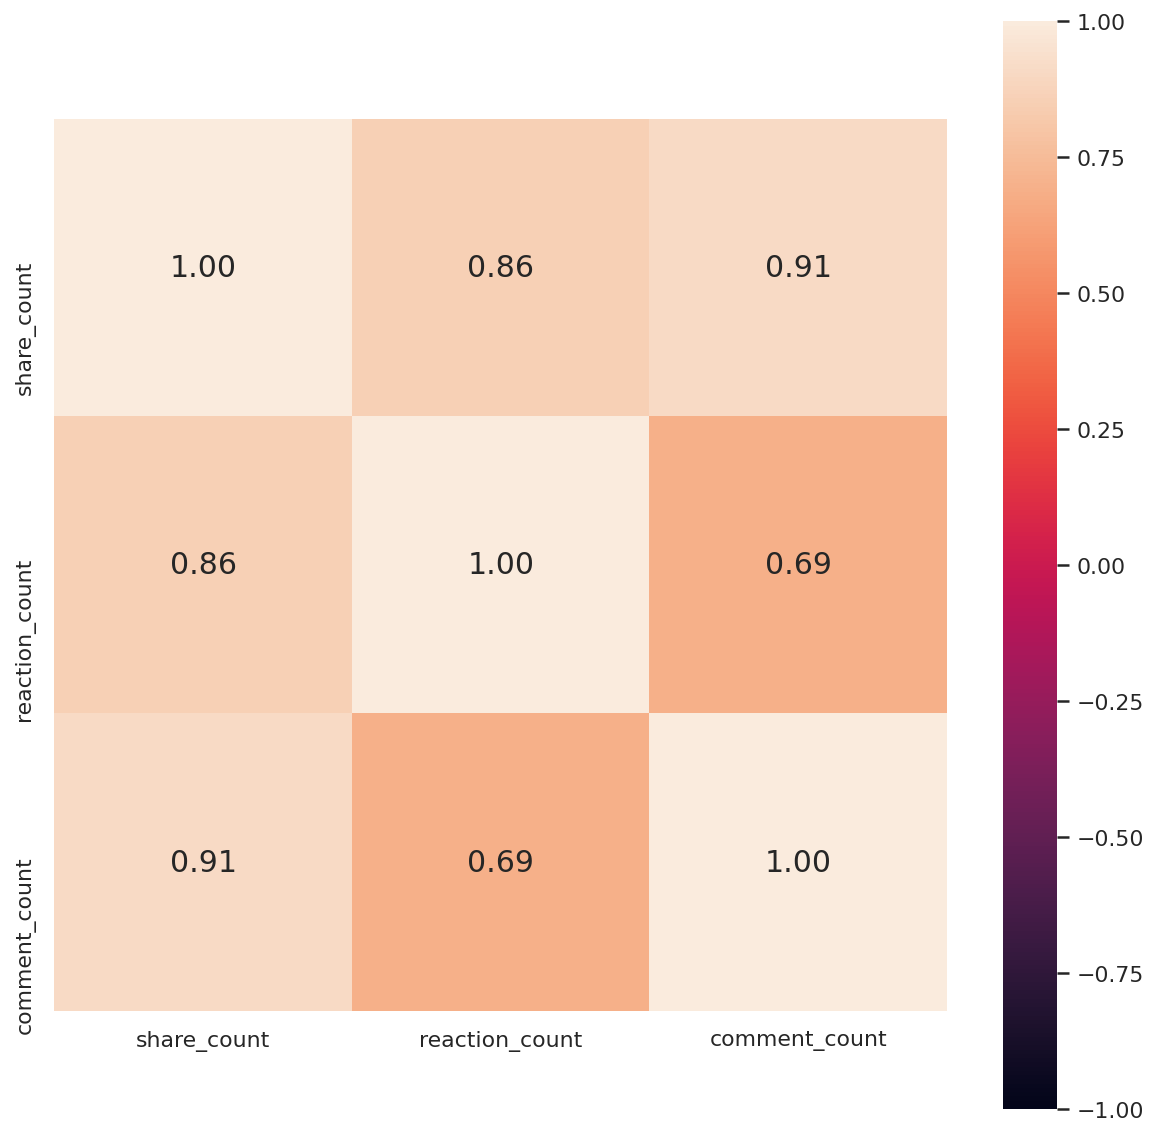

In [20]:
check_correlations(df, numerical_attributes)